In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyccl as ccl
%matplotlib inline

IMPORTANT: see https://github.com/LSSTDESC/CCLX/blob/master/GeneralizedTracers.ipynb for an explanation of what we're doing here

In [2]:
# Cosmology
cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, A_s=2.1e-9, n_s=0.96)

In [3]:
# Redshift-dependent functions
z = np.linspace(0,1.2,256)
# Redshift distributions
nz1 = np.exp(-((z-0.5)/0.05)**2/2)

In [4]:
# First, initialize empty tracer
gc_custom = ccl.Tracer()

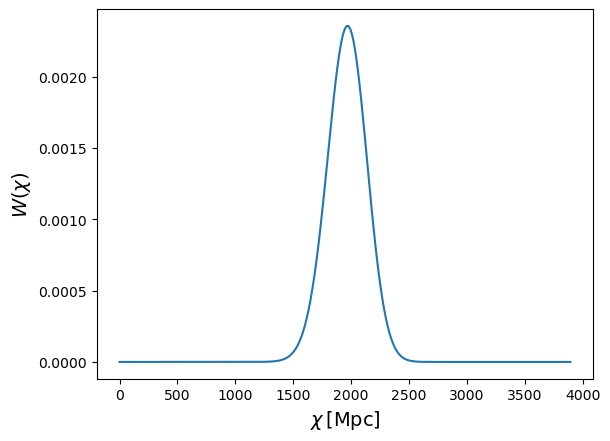

In [5]:
# Now we need to generate a radial kernel and a transfer function.
# To generate the radial kernel we can use a convenience function that exists in CCL:
kernel = ccl.get_density_kernel(cosmo, (z,nz1))
# Let's plot it out of curiosity:
plt.plot(kernel[0],kernel[1])
plt.xlabel('$\\chi\\,[{\\rm Mpc}]$',fontsize=14)
plt.ylabel('$W(\\chi)$',fontsize=14)
plt.show()

In [14]:
# Use a linear galaxy bias for now
bz = 0.95/ccl.growth_factor(cosmo,1./(1+z))

# Because this tracer has a simple linear bias, the transfer function
# is only z-dependent and not k-dependent. So it's factorizable.
# The scale factor values need to be increasing, so we'll reverse
# The order of all arrays:
sf = (1./(1+z))[::-1]
transfer_a = (sf,bz[::-1])

In [15]:
# Now we're ready to add the density contribution to the tracer:
gc_custom.add_tracer(cosmo, kernel=kernel, transfer_a=transfer_a)

I don't think this uses Limber

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


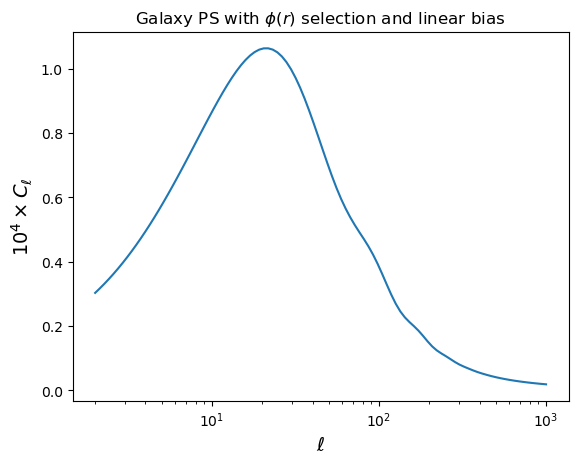

In [20]:
ells = np.geomspace(2,1000,100)
# If we have a model for the galaxy power spectrum, plug it into p_of_k_a
# There's more info at https://github.com/LSSTDESC/CCLX/blob/master/GeneralizedTracers.ipynb
# and https://ccl.readthedocs.io/en/latest/api/pyccl.pk2d.html?highlight=pk2d
cl_gc_custom = ccl.angular_cl(cosmo, gc_custom, gc_custom, ells, p_of_k_a=None)

# Let's plot the result
plt.plot(ells, 1E4*cl_gc_custom)

plt.xscale('log')
plt.xlabel('$\ell$', fontsize=14)
plt.ylabel('$10^4\\times C_\ell$', fontsize=14)
plt.title(r'Galaxy PS with $\phi(r)$ selection and linear bias')
plt.legend(loc='upper right', fontsize=12, frameon=False)